Import Necessary Libraries

In [35]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

Read dataframe

In [36]:
df = pd.read_csv("/content/ECOMM DATA.csv")
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [37]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [38]:
df.isna().sum() #shows that there are no null values

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0
Hour,0


In [39]:
# Let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY),0
1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY),7
2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY),18
3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA),15
4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA),12


Question 1:What was the best month for sales? How much was earned that month?


In [40]:
results = df.groupby('Month').sum()

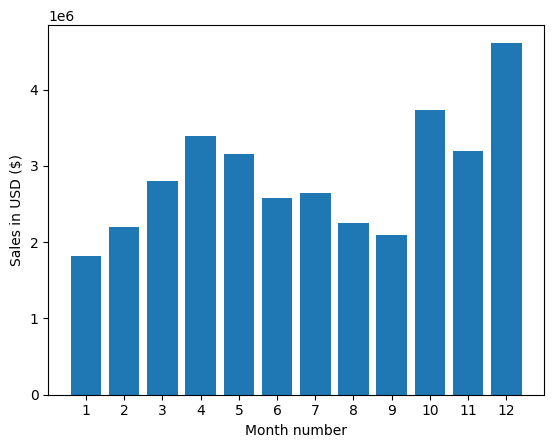

In [41]:
months=range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel("Month number")
plt.ylabel("Sales in USD ($)")
plt.show()

Question 2:What city sold the most product?

In [42]:
city_sales=df.groupby('City')['Sales'].sum().nlargest(5)
city_sales

,Sales
City,
San Francisco(CA),8262203.91
Los Angeles(CA),5452570.80
New York City(NY),4664317.43
Boston(MA),3661642.01
Atlanta(GA),2795498.58


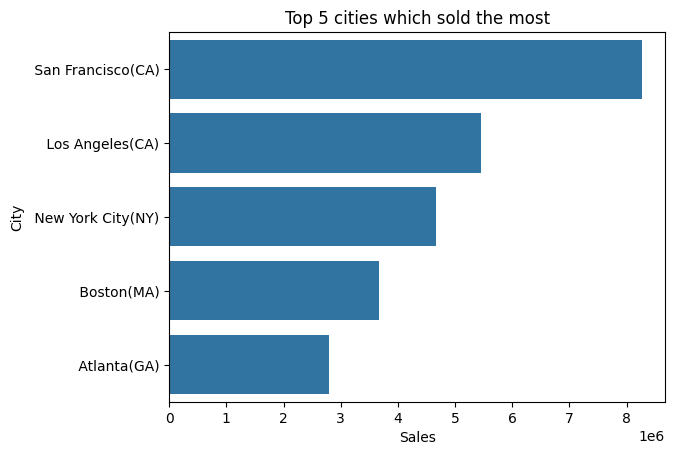

In [43]:
sns.barplot(y=city_sales.index,x=city_sales).set(title='Top 5 cities which sold the most' );

Question 3:What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-44-f5779b1b9e1a>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [45]:
# Add hour column
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY),0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA),12,38,1


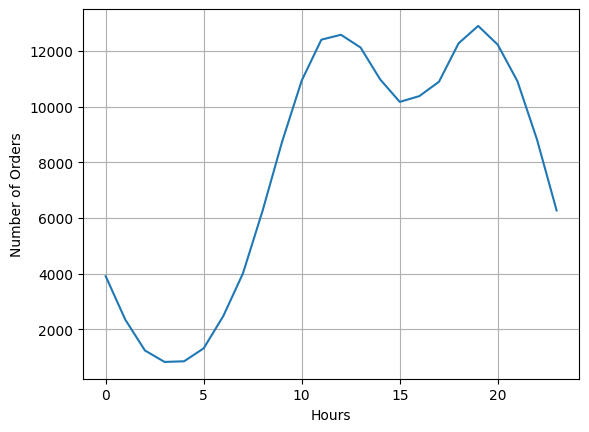

In [46]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

# My recommendation is slightly before 11am or 7pm

Question 4 : What products are most often sold together?

In [47]:
df1 = df[df['Order Date'].duplicated(keep=False)]

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1 = df1[['Order ID', 'Grouped']].drop_duplicates()
df1.head()

<ipython-input-47-92fd0b461776>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,295667,USB-C Charging Cable
3,295668,27in FHD Monitor
4,295669,USB-C Charging Cable
9,295674,AAA Batteries (4-pack)
11,295676,ThinkPad Laptop


from matplotlib import pyplot as plt
_df_5['Order ID'].plot(kind='hist', bins=20, title='Order ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Grouped').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Order ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Order ID'}, axis=1)
              .sort_values('Order ID', ascending=True))
  xs = counted['Order ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Order ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Grouped')):
  _plot_series(series, series_name, i)
  fig.legend(title='Grouped', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Order ID'].plot(kind='line', figsize=(8, 4), title='Order ID')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Grouped'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Order ID', y='Grouped', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [48]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
